# Loading in the data

In [275]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [276]:
# Download latest version
path = kagglehub.dataset_download("mobasshir/yelpdata")

print("Path to dataset files:", path)

Path to dataset files: /home/abhay/.cache/kagglehub/datasets/mobasshir/yelpdata/versions/2


In [277]:
arizona_df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "mobasshir/yelpdata", "yelp_review_arizona.csv")
business_df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "mobasshir/yelpdata", "yelp_business.csv")

In [278]:
display(business_df.head(5))

display(arizona_df.head(5))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",NaN
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,NaN,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


,review_id,user_id,business_id,text,stars,date
0,V93SYj2OLh5m9Cquzf-7kg,ZwVz20be-hOZnyAbevyMyQ,2c9Vptks_vowLgVUMnCgjw,Came here while in town for a country concert....,4.0,2013-09-04 01:29:46
1,vNTFadc6T9HeH3Qa78dc_Q,91TB-gzcNyxFh46TL0pmnQ,6nKR80xEGHYf2UxAe_Cu_g,Best barbecue this side of the Mississippi!!!!...,5.0,2015-12-05 02:50:10
2,SXRFBCt5eXCBF7TlI7UG6Q,Y_QBiZpATJoz8hKUfYF66A,fbQaKW0Lte0JQ_opbnjdKg,Absolutely amazing. Think Chipotle for enchila...,5.0,2014-04-01 01:56:00
3,CqMNjtG0hNZGhDw4RDE-zw,_Jg-IA0M-GSjBlGu-wmejg,r8764MtYyt8JhxMvrfM_xQ,I was really disappointed with my most recent ...,2.0,2014-10-11 03:53:53
4,5hZLouGEW4wm6BTJ5aNUNw,1CqkFliipv_X15WYn5aPfg,QS3QxI7u5PRdtbGgI0-UsA,I grade sushi restaurants on 3 factors:\n- Qua...,4.0,2015-03-04 19:36:21


# Exploring the data


In [297]:
from numpy import array
import sklearn
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten, LSTM
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Concatenate
import pandas as pd
import numpy as np
import re
import os

import matplotlib.pyplot as plt

In [280]:
print("Total businesses: ", len(business_df))
print("Total reviews: ", len(arizona_df))

Total businesses:  192609
Total reviews:  26606


# The prof's method

https://stackabuse.com/python-for-nlp-multi-label-text-classification-with-keras/

In [281]:
all_data = pd.merge(arizona_df, business_df, on='business_id', how='inner')

all_data.head(20).to_csv('all_data.csv', index=False)

all_data.head(5)

,review_id,user_id,business_id,text,stars_x,date,name,address,city,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,V93SYj2OLh5m9Cquzf-7kg,ZwVz20be-hOZnyAbevyMyQ,2c9Vptks_vowLgVUMnCgjw,Came here while in town for a country concert....,4.0,2013-09-04 01:29:46,Dierks Bentley's Whiskey Row,"4420 N Saddlebag Trl, Ste 105",Scottsdale,AZ,85251,33.501037,-111.922358,3.5,453,1,"{'BusinessAcceptsBitcoin': 'False', 'Ambience'...","American (Traditional), Breakfast & Brunch, Fo...","{'Monday': '20:0-2:0', 'Tuesday': '16:0-2:0', ..."
1,vNTFadc6T9HeH3Qa78dc_Q,91TB-gzcNyxFh46TL0pmnQ,6nKR80xEGHYf2UxAe_Cu_g,Best barbecue this side of the Mississippi!!!!...,5.0,2015-12-05 02:50:10,The Thumb BBQ,9393 E Bell Rd,Scottsdale,AZ,85260,33.639370,-111.879257,4.5,917,1,"{'WiFi': ""u'free'"", 'HasTV': 'True', 'Restaura...","Farmers Market, Gas Stations, Automotive, Car ...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
2,SXRFBCt5eXCBF7TlI7UG6Q,Y_QBiZpATJoz8hKUfYF66A,fbQaKW0Lte0JQ_opbnjdKg,Absolutely amazing. Think Chipotle for enchila...,5.0,2014-04-01 01:56:00,Gadzooks Enchiladas & Soup,3313 N 7th St,Phoenix,AZ,85014,33.487215,-112.064760,4.0,811,1,"{'BusinessParking': ""{'garage': False, 'street...","Restaurants, Specialty Food, Food, Soup, Break...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,CqMNjtG0hNZGhDw4RDE-zw,_Jg-IA0M-GSjBlGu-wmejg,r8764MtYyt8JhxMvrfM_xQ,I was really disappointed with my most recent ...,2.0,2014-10-11 03:53:53,Vintage 95,95 W Boston,Chandler,AZ,85225,33.302093,-111.842613,4.0,320,0,"{'OutdoorSeating': 'True', 'HasTV': 'True', 'N...","American (New), Bars, Wine Bars, Nightlife, Re...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
4,5hZLouGEW4wm6BTJ5aNUNw,1CqkFliipv_X15WYn5aPfg,QS3QxI7u5PRdtbGgI0-UsA,I grade sushi restaurants on 3 factors:\n- Qua...,4.0,2015-03-04 19:36:21,Sakana Sushi & Grill,"6989 N Hayden Rd, Ste A12",Scottsdale,AZ,85250,33.538029,-111.905676,4.0,347,1,"{'RestaurantsAttire': ""'casual'"", 'OutdoorSeat...","Asian Fusion, Restaurants, Seafood, Sushi Bars...","{'Monday': '0:0-0:0', 'Tuesday': '17:30-21:0',..."


In [282]:
filter = (all_data['text'] != "") & (all_data['categories'] != "")
all_data = all_data[filter]
combined_data = all_data.dropna()

In [283]:
def text_to_category_array(text):
    arr = []
    categories = text.split(',')
    for i in categories:
        arr.append(re.sub(r'\W+', '', i))
    
    return arr


In [284]:
total_unique_categories = {}

for i in combined_data["categories"]:
    diff_categories = i.split(",")
    for j in diff_categories:
        string = re.sub(r'\W+', '', j)
        if string in total_unique_categories.keys():
            total_unique_categories[string] += 1
        else:
            total_unique_categories[string] = 1

display(total_unique_categories)

total_unique_categories.pop('Restaurants')

# Total unique categories and how frequently they occur
dict(sorted(total_unique_categories.items(), key=lambda item: item[1], reverse=True))

{'AmericanTraditional': 5236,
 'BreakfastBrunch': 5743,
 'Food': 8361,
 'WhiskeyBars': 89,
 'Desserts': 1534,
 'Restaurants': 25382,
 'Bars': 8328,
 'CountryDanceHalls': 17,
 'ArtsEntertainment': 882,
 'Nightlife': 8640,
 'MusicVenues': 477,
 'AmericanNew': 6774,
 'Gastropubs': 1048,
 'FarmersMarket': 152,
 'GasStations': 43,
 'Automotive': 55,
 'CarWash': 43,
 'Burgers': 2637,
 'Bakeries': 1188,
 'Barbeque': 1045,
 'Caterers': 1097,
 'EventPlanningServices': 2183,
 'SpecialtyFood': 906,
 'Soup': 469,
 'LocalFlavor': 436,
 'Mexican': 3524,
 'Tacos': 398,
 'WineBars': 1582,
 'AsianFusion': 1564,
 'Seafood': 2551,
 'SushiBars': 1758,
 'Japanese': 1565,
 'Ramen': 258,
 'TapasBars': 140,
 'Pakistani': 174,
 'GlutenFree': 1423,
 'Salad': 2148,
 'Indian': 317,
 'VenuesEventSpaces': 940,
 'Mediterranean': 1166,
 'Chinese': 1019,
 'Vegan': 1082,
 'Vegetarian': 1469,
 'Greek': 643,
 'Sandwiches': 3843,
 'Pizza': 3227,
 'CoffeeTea': 2231,
 'Creperies': 82,
 'Cafes': 1422,
 'Vietnamese': 556,
 'T

{'Nightlife': 8640,
 'Food': 8361,
 'Bars': 8328,
 'AmericanNew': 6774,
 'BreakfastBrunch': 5743,
 'AmericanTraditional': 5236,
 'Sandwiches': 3843,
 'Mexican': 3524,
 'Pizza': 3227,
 'Italian': 3172,
 'Burgers': 2637,
 'Seafood': 2551,
 'CoffeeTea': 2231,
 'EventPlanningServices': 2183,
 'Salad': 2148,
 'SushiBars': 1758,
 'WineBars': 1582,
 'Japanese': 1565,
 'AsianFusion': 1564,
 'Steakhouses': 1538,
 'Desserts': 1534,
 'Vegetarian': 1469,
 'Beer': 1467,
 'WineSpirits': 1467,
 'GlutenFree': 1423,
 'Cafes': 1422,
 'CocktailBars': 1422,
 'Pubs': 1335,
 'Bakeries': 1188,
 'Mediterranean': 1166,
 'Caterers': 1097,
 'Vegan': 1082,
 'Lounges': 1082,
 'Gastropubs': 1048,
 'Barbeque': 1045,
 'Chinese': 1019,
 'SportsBars': 1004,
 'VenuesEventSpaces': 940,
 'SpecialtyFood': 906,
 'ArtsEntertainment': 882,
 'Thai': 832,
 'Breweries': 773,
 'Greek': 643,
 'Delis': 571,
 'Vietnamese': 556,
 'IceCreamFrozenYogurt': 540,
 'JuiceBarsSmoothies': 531,
 'Diners': 514,
 'ChickenWings': 493,
 'MusicVen

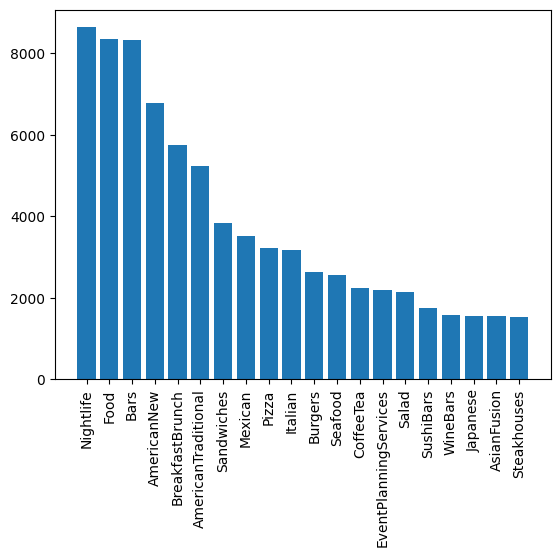

In [285]:
# The categories we are going to use, the top 20 most frequent
OUTPUT_CATEGORIES_NUM = 20

# Get the top 20 most frequent categories
top_categories = dict(sorted(total_unique_categories.items(), key=lambda item: item[1], reverse=True)[:OUTPUT_CATEGORIES_NUM])


plt.bar(top_categories.keys(), top_categories.values())
plt.xticks(rotation=90)
plt.show()

# New thing (basically the same)

In [286]:
all_data["categories"] = all_data["categories"].apply(lambda x: text_to_category_array(x))

In [287]:
list(top_categories.keys())

['Nightlife',
 'Food',
 'Bars',
 'AmericanNew',
 'BreakfastBrunch',
 'AmericanTraditional',
 'Sandwiches',
 'Mexican',
 'Pizza',
 'Italian',
 'Burgers',
 'Seafood',
 'CoffeeTea',
 'EventPlanningServices',
 'Salad',
 'SushiBars',
 'WineBars',
 'Japanese',
 'AsianFusion',
 'Steakhouses']

In [288]:
all_data["categories"] = all_data["categories"].apply(lambda x: [j for j in x if j in top_categories.keys()])

all_data["categories"] = all_data["categories"].apply(lambda x: x if len(x) > 0 else 'None')

display(all_data["categories"])

0        [AmericanTraditional, BreakfastBrunch, Food, B...
1        [BreakfastBrunch, Burgers, Food, AmericanTradi...
2                         [Food, BreakfastBrunch, Mexican]
3                 [AmericanNew, Bars, WineBars, Nightlife]
4              [AsianFusion, Seafood, SushiBars, Japanese]
                               ...                        
26601               [Nightlife, Sandwiches, Mexican, Bars]
26602                     [Food, Mexican, BreakfastBrunch]
26603             [Bars, Nightlife, AmericanNew, WineBars]
26604                                            [Mexican]
26605                      [Steakhouses, Italian, Seafood]
Name: categories, Length: 26606, dtype: object

In [289]:
mlb = sklearn.preprocessing.MultiLabelBinarizer()

y = mlb.fit_transform(all_data["categories"])

In [290]:
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(all_data["text"])

X = tokenizer.texts_to_sequences(all_data["text"])
X = pad_sequences(X, maxlen=max_len, padding="post", truncating="post")

In [291]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(128, activation="relu"),
    Dense(y.shape[1], activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

/home/abhay/Documents/Repo/abhayma1000/DS3010/FinalProject/venv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [292]:
# Takes approx. 5 mins
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)



Epoch 1/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 34s 47ms/step - accuracy: 0.0619 - loss: 0.3928 - val_accuracy: 0.0761 - val_loss: 0.3654
Epoch 2/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 31s 46ms/step - accuracy: 0.0439 - loss: 0.3640 - val_accuracy: 0.0111 - val_loss: 0.3668
Epoch 3/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 31s 46ms/step - accuracy: 0.0438 - loss: 0.3630 - val_accuracy: 0.0314 - val_loss: 0.3664
Epoch 4/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 31s 46ms/step - accuracy: 0.0617 - loss: 0.3443 - val_accuracy: 0.1385 - val_loss: 0.3091
Epoch 5/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 31s 46ms/step - accuracy: 0.1200 - loss: 0.2854 - val_accuracy: 0.1253 - val_loss: 0.2818
Epoch 6/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 31s 46ms/step - accuracy: 0.1653 - loss: 0.2539 - val_accuracy: 0.1321 - val_loss: 0.2800
Epoch 7/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 31s 46ms/step - accuracy: 0.1863 - loss: 0.2389 - val_accuracy: 0.1546 - val_loss: 0.2801
Epoch 8/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 31s 47ms/step - accuracy: 0.1967 - loss: 0.2268 - 

In [ ]:
# model = tf.keras.models.load_model(os.path.join('models', 'yelp_review_model0.keras'))

In [310]:
rand_num = np.random.randint(0, len(all_data))
the_text = all_data["text"][rand_num]

display(the_text)

sequence = tokenizer.texts_to_sequences([the_text])

padded_sequence = pad_sequences(sequence, maxlen=max_len, padding="post", truncating="post")

pred = model.predict(padded_sequence)

pred_labels = mlb.inverse_transform((pred > 0.5).astype(int))

print("Predicted:", str(pred_labels))

print("Actual: ", all_data["categories"][rand_num])

'I returned.  The pasta is still gummy and stuck together, but the Bolognese \nWas much better.   It actually needed cracked red pepper to make it flavorful.  Our waiter was great.  If they could figure out how to boil pasta this might be a great place.'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted: [('Italian', 'Pizza')]
Actual:  ['Pizza', 'Italian']


In [301]:
num = 0
path = os.path.join('models', f'yelp_review_model{num}.keras')
while path in os.listdir('models'):
    num += 1
    path = os.path.join('models', f'yelp_review_model{num}.keras')
model.save(path)